In [611]:
import pandas as pd
df=pd.read_csv("E:\\csv files\\car-price.csv")

In [612]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,5,27,0,1,0,0,0,2,0,2,...,18,5,23,4,13,5,10,8,10,13495
1,5,27,0,1,0,0,0,2,0,2,...,18,5,23,4,13,5,10,8,10,16500
2,3,27,0,1,0,0,2,2,0,10,...,28,5,1,27,13,20,10,6,9,16500
3,4,27,1,1,0,1,3,1,0,30,...,11,5,13,24,22,2,16,11,13,13950
4,4,27,1,1,0,1,3,0,0,28,...,22,5,13,24,5,8,16,5,5,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,49,21,1,0,1,3,2,0,46,...,24,5,35,15,20,7,15,10,11,16845
201,1,49,21,1,1,1,3,2,0,46,...,24,5,35,15,11,23,14,6,8,19045
202,1,49,21,1,0,1,3,2,0,46,...,33,5,26,7,12,13,16,5,6,21485
203,1,49,21,0,1,1,3,2,0,46,...,25,3,6,24,31,3,8,13,10,22470


In [613]:
data=df.values
data

array([[    5,    27,     0, ...,     8,    10, 13495],
       [    5,    27,     0, ...,     8,    10, 16500],
       [    3,    27,     0, ...,     6,     9, 16500],
       ...,
       [    1,    49,    21, ...,     5,     6, 21485],
       [    1,    49,    21, ...,    13,    10, 22470],
       [    1,    49,    21, ...,     6,     8, 22625]], dtype=int64)

In [614]:
x=[]
for i in range(len(data[0])-1):
    x.append(df.iloc[:,i])


In [615]:
target=df.iloc[:,-1]


In [616]:
import numpy as np
import copy 
def covariance(x,y):

    global covar1
    covar1=[]
    covar=0
    for i in range(len(data[0])-1):
        for j in range(len(df)):

            covar=((x[i][j])-x[i].mean())*(y[j]-y.mean())
            
            covar1.append(covar)
    
covariance(x,target)
sim=copy.deepcopy(covar1)
res=[]
for i in range(len(data[0])-1):
    res.append(sim[0:len(df)])
    del sim[0:len(df)]

real_covar1=[sum(i) for i in res]
real_covar1
print("Covariance:",real_covar1)

Covariance: [-38513.81951219503, 3236148.2829268305, -192918.68292683025, -88344.65853658537, 150475.0682926829, 33447.61951219511, -37820.55121951218, 330840.5560975611, 36321.2487804878, 8762795.370731711, 15092790.936585363, 8573182.595121961, 3652639.648780488, 41964568.08292683, -32157.751219512193, 486720.7219512193, 8409375.863414634, 1338432.3121951218, 5084728.75121951, 664153.0585365851, 135827.90731707297, -8590675.765853655, -413222.3756097572, -4326718.009756099, -4187082.1121951216]


In [617]:
import numpy as np
def variance(x):
    
    global var1
    var1=[]    
    for i in range(len(data[0])-1):
        for j in range(len(df)):
            
            var=(((x[i][j])-x[i].mean())**2)
            var1.append(var)
    
variance(x)
sim_var1=copy.deepcopy(var1)
res_var1=[]
for i in range(len(data[0])-1):
    res_var1.append(sim_var1[0:len(df)])
    del sim_var1[0:len(df)]
real_var1=[sum(i) for i in res_var1]
print("variance:",real_var1)
    

variance: [316.36097560975617, 41886.995121951244, 8032.1951219512175, 18.04878048780482, 30.321951219512233, 50.360975609755926, 150.5560975609758, 63.10243902439023, 2.956097560975603, 39812.71219512192, 91167.28780487803, 24060.89756097564, 35306.55609756097, 494732.9951219511, 226.95609756097593, 161.7756097560975, 24021.287804878004, 826.8097560975601, 20370.956097560967, 15106.84878048781, 10314.419512195145, 70361.58048780488, 5513.239024390238, 7955.190243902428, 7344.40975609756]


In [618]:
m=[real_covar1[i]/real_var1[i] for i in range(len(real_var1))]
print("SLOPE:",m)

SLOPE: [-121.74010855151539, 77.25902212619923, -24.01817684926528, -4894.771621621638, 4962.578667953661, 664.1574970941516, -251.20570891653665, 5242.912337662341, 12286.891089108936, 220.10043746292115, 165.55050939858938, 356.3118363891296, 103.4549968194949, 84.82265888205539, -141.69150582469996, 3008.6162103485703, 350.0801427351843, 1618.7911455137598, 249.60677971459126, 43.96370601090634, 13.16873985554672, -122.0932745725147, -74.95092699258753, -543.8861770870262, -570.1046443819225]


In [619]:
intercept=[]
for i in range(len(data[0])-1):
    c=((target.mean())-(m[i]*(x[i].mean())))
    intercept.append(c)
print("INTERCEPT:",intercept)

INTERCEPT: [12765.946356431366, 10597.227277713764, 12713.821668893479, 16838.150000000016, 11525.232142857143, 12045.101123595503, 13077.728097459822, 5464.467532467526, 12241.108910891087, 7457.383793214221, 6500.669344385079, 6057.709107216567, 10019.247171395236, 5465.0452757744715, 12848.065124876412, 5391.028464600169, 6595.925039659932, 7153.923443621084, 7931.647820450254, 11572.524775711485, 12235.07724681904, 16229.03608593492, 13283.401155002506, 19011.22567748377, 20029.72832697044]


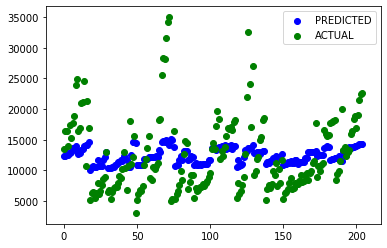

In [620]:
import pandas as pd
import matplotlib.pyplot as plt
test_data=pd.read_csv("E:\\csv files\\test_data.csv")
def predictions(data):
    global pred
    given=data.values
    x_train=x
    y_train=target
    m=[real_covar1[i]/real_var1[i] for i in range(len(real_var1))]
    intercept=[]
    for i in range(len(given[0])-1):
        c=((y_train.mean())-(m[i]*(x_train[i].mean())))
        intercept.append(c)
    
    tar=[]
    for i in range(len(given[0])-1):
        for j in range(len(given)):
        
            tar.append(m[i]*x[i][j]+intercept[i])
    import copy 
    fin_tar=copy.deepcopy(tar)


    final=[]
    for i in range(len(given[0])-1):
        final.append(fin_tar[0:len(given)])
        del fin_tar[0:len(df)]
    pred1=[[row[i] for row in final] for i in range(len(data))]


    pred=[(sum(i)/len(i)) for i in pred1]
    return pred
    
predictions(test_data)
c=[i for i in range(len(test_data))]
plt.scatter(c,pred,color="blue",label="PREDICTED")
plt.scatter(c,target,color="green",label="ACTUAL")
plt.legend()

In [621]:
tar=[]
for i in range(len(x)):
    for j in range(len(df)):
        
        tar.append(m[i]*x[i][j]+intercept[i])
import copy 
fin_tar=copy.deepcopy(tar)

final=[]
for i in range(len(data[0])-1):
    final.append(fin_tar[0:len(df)])
    del fin_tar[0:len(df)]
pred1=[[row[i] for row in final] for i in range(len(df))]


pred=[(sum(i)/len(i)) for i in pred1]
from sklearn.metrics import r2_score
print("ACCURACY:",r2_score(pred,target))

c=[i for i in range(len(df))]

print("PREDICTED_VALS:",pred)
print("ACTUAL_VALS:",target)

ACCURACY: -14.974494693722926
PREDICTED_VALS: [12481.889481934053, 12481.889481934053, 12996.268360150903, 12555.733476246605, 13075.648163339669, 13073.32947197219, 13779.06621062305, 13796.161233108649, 14071.127976314496, 13310.261110008583, 12769.34419079291, 12805.649699360796, 13424.370763529714, 13467.901595189891, 14009.650176010757, 14342.989341891218, 14344.698277435415, 14736.404545600133, 9893.15146551402, 10458.241410874036, 10508.815038280078, 10390.695075057227, 10566.309379514445, 11727.623524424012, 10670.232138234911, 10670.362628944094, 10670.362628944094, 11790.961897590274, 12188.712671940426, 13120.722823570763, 10058.48538054869, 10398.58187126869, 10226.674215625397, 10595.588986926407, 10612.553518702818, 10889.8648628482, 11006.130134314426, 11312.29002402704, 11339.433274869298, 11645.964819190573, 11505.47129492133, 12476.11744471957, 11810.589669805386, 11755.141047384492, 10352.600174744024, 10404.393517101546, 12510.592658661295, 14792.164365172936, 14739

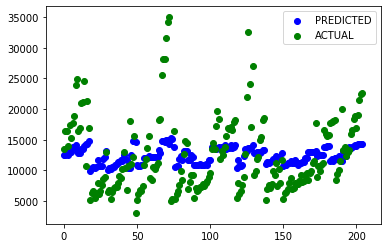

In [622]:
import matplotlib.pyplot as plt
plt.scatter(c,pred,color="blue",label="PREDICTED")
plt.scatter(c,target,color="green",label="ACTUAL")
plt.legend()